## SAT terms on material boundary interfaces

In [19]:
from sympy import *
from sympy import oo

v1/2  : velocity at + and - side.

p1/2  : pressure at + and - side.

Z1/2  : impedance at + and - side.

sat1/2: SAT coefficients at + and - side.

In [2]:
A, v1, v2, p1, p2, Z1, Z2, sat1, sat2, p_c = symbols('A v1 v2 p1 p2 Z1 Z2 sat1 sat2 pc')

In [2]:
init_printing(use_unicode=True)

In [12]:
vhat = (p2 - p1 + Z1*v1 + Z2*v2)/(Z1 + Z2)
phat = (Z1*p2 + Z2*p1 + Z1*Z2*(v2 - v1))/(Z1 + Z2)

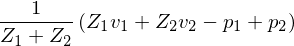

In [13]:
vhat

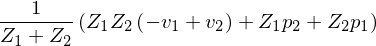

In [14]:
phat

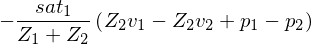

In [15]:
simplify(-sat1*(v1 - vhat))

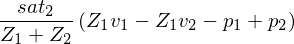

In [16]:
simplify(-sat2*(v2 - vhat))

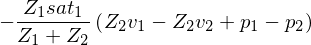

In [17]:
simplify(-sat1*(p1 - phat))

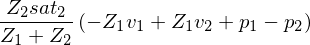

In [18]:
simplify(-sat2*(p2 - phat))

### For a crack interface

In [19]:
vhat1 = (Z1*v1-p1 + p_c)/Z1
vhat2 = (Z2*v2+p2 - p_c)/Z2
print(vhat1)
print(vhat2)

(Z1*v1 - p1 + pc)/Z1
(Z2*v2 + p2 - pc)/Z2


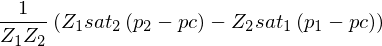

In [20]:
simplify(-sat1*(v1 - vhat1)-sat2*(v2-vhat2))

In [22]:
simplify(-sat1*(p1-p_c)-sat2*(p2-p_c))

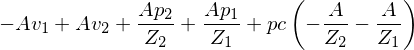

In [23]:
Q = A*(vhat2 - vhat1)
simplify(Q).expand().collect(p_c)

### For a crack bottom

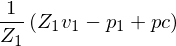

In [13]:
vhat1 = (Z1*v1-p1 + p_c)/Z1
vhat1

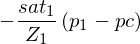

In [14]:
simplify(-sat1*(v1 - vhat1))

In [15]:
simplify(-sat1*(p1 - pc))

## Material interface considering moving surface and cross-section area jump

In [36]:
A1, A2, v1, v2, p1, p2, rho1, c1, rho2, c2, Z1, Z2, eta, g = symbols('A1, A2, v1, v2, p1, p2, rho1, c1, rho2, c2, Z1, Z2, eta, g')
# hat variables.
v1hat, v2hat, p1hat, p2hat, sat1, sat2 = symbols('v1hat, v2hat, p1hat, p2hat, sat1, sat2')

### 1. a pure material interface with no jump in surface area, including the gravity term.

v1/2  : velocity at + and - side.

p1/2  : pressure at + and - side.

Z1/2  : impedance at + and - side.

eta   : moving surface location, positive in vertical up direction

In [37]:
# continuity of pressure and velocity at the moving interface
# p_1(eta) = p_2(eta)
# v_1(eta) = v_2(eta)

# linearization the interface condition

# pressure:
# note that p1/2_z is dominated by the pressure of the background state.
# p1(eta) = p1(0)+ p1_z*eta = p1 - rho1*g*eta
# p2(eta) = p2(0)+ p2_z*eta = p2 - rho2*g*eta

# velocity:
# there's not velocity gradient in the background state, therefore v1/2_z*eta is a second order term
# v1(eta) = v1(0)+ v1_z*eta = v1
# v2(eta) = v2(0)+ v2_z*eta = v2

# Jump condition in terms of p1, and p2 (evaludated at the un-perturbed interface)
# p1hat - p2hat = (rho1-rho2)*g*eta
# v1hat - v2hat = 0

# At -/+ side of interface, we need to preserving the upgoing/downgoing characteristics
#  Z2*v2+p2 = Z2*v2hat+p2hat
#  Z1*v1-p1 = Z1*v1hat-p1hat

# Finally we have an kinematic equation relating moving surface height to interface velocity
# eta_t = vhat

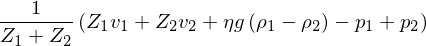

In [49]:
v1hat = v2hat = ((Z1*v1-p1) + (Z2*v2+p2) + (rho1-rho2)*g*eta)/(Z1+Z2)
p1hat = -(Z1*v1-p1 - Z1*v1hat)
p2hat = Z2*v2+p2 - Z2*v2hat
simplify(v1hat)
# if we set g=0, we should make sure the expressions recover to the previous simpler version.

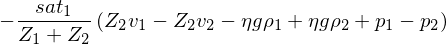

In [50]:
# sat terms for velocity and pressure.
simplify(-sat1*(v1 - v1hat))

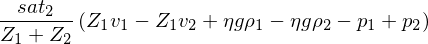

In [48]:
simplify(-sat2*(v2-v2hat))

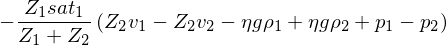

In [41]:
simplify(-sat1*(p1 - p1hat))

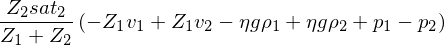

In [42]:
simplify(-sat2*(p2-p2hat))

### 1. a pure jump in cross-section with no jump in material properties.

A1/2  : cross-section at + and - side.

v1/2  : velocity at + and - side.

p1/2  : pressure at + and - side.

Z1/2  : impedance at + and - side.

eta   : moving surface location, positive in vertical up direction

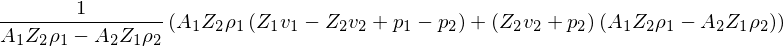

In [55]:
# conservation of mass and momentum:
# (A*rho)_t + (A*rho*v)_z = 0
# (A*rho*v)_t + (A*p)_z = 0

# Jump conditions:
# A1*rho1*v1hat = A2*rho2*v2hat
# p1hat         = p2hat

# preserving the two characteristics:
#  Z2*v2+p2 = Z2*v2hat+p2hat
#  Z1*v1-p1 = Z1*v1hat-p1hat

# Z1*v1hat - Z2*v2hat = (Z1*v1+p1) - (Z2*v2+p2)
# Z1*v1hat - Z2*A1*rho1/(A2*rho2)*v1hat = (Z1*v1+p1)*A1 - (Z2*v2+p2)*A2
v1hat = ((Z1*v1+p1) - (Z2*v2+p2))/(Z1 - Z2*A1/A2*rho1/rho2)
v2hat = A1*rho1*v1hat/(A2*rho2)
p2hat = Z2*v2+p2-(Z2*v2hat)
p1hat = Z1*v1+p1-(Z1*v1hat)

simplify(v1hat)
simplify(v2hat)
simplify(p1hat)
simplify(p2hat)

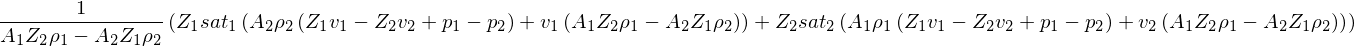

In [56]:
# sat terms for velocity and pressure.
simplify(-sat1*(v1 - v1hat)-sat2*(v2-v2hat))
simplify(-sat1*(p1 - p1hat)-sat2*(p2-p2hat))